In [7]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_losses_from_files(model_name,train_loss_file,val_loss_file,start=0,end=None,plot_title="LSTM Performance"):
    T = pd.read_csv(train_loss_file)
    V = pd.read_csv(val_loss_file)
    
    #print(list(T['loss']))
    #print(V['loss'])
    
    y = range(len(T))
    train_loss = list(T['loss'])
    val_loss = list(V['loss'])
    #val_loss = val_loss[1:]
    
    if len(val_loss) < len(train_loss) and val_loss:
        val_loss.append(val_loss[-1])
    
    if not end:
        end=len(train_loss)
    if train_loss:
        plt.plot(y[start:end],train_loss[start:end])
    if val_loss:
        plt.plot(y[start:end],val_loss[start:end])
        
    plt.legend(["train loss", "validation loss"])
    plt.xlabel("# of minibatches")
    plt.ylabel("loss value")
    plt.title(plot_title)
    plt.savefig("./output/{}/{}.png".format(model_name,"losses_plot"), dpi=80)
    plt.show()
    

def plot_lossed_from_df(model_name,V,T,start):
    y = T['minibatch']
    train_loss = list(T['loss'])
    val_loss = list(V['loss'])
    #val_loss = val_loss[1:]
    
    if len(val_loss) < len(train_loss) and val_loss:
        val_loss.append(val_loss[-1])
    
    if train_loss:
        plt.plot(y[start:],train_loss[start:])
    if val_loss:
        plt.plot(y[start:],val_loss[start:])
    plt.legend(["train loss", "validation loss"])
    plt.xlabel("# of minibatches")
    plt.ylabel("loss value")
    plt.title("Performance of the Custom Model")
    plt.show()
    

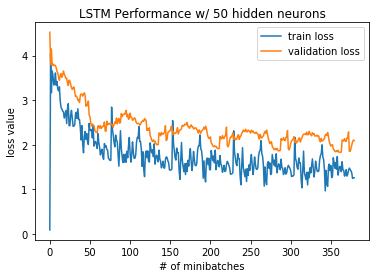

In [4]:
model_name="lstm75"
val_loss_file = "./output/{}/validation_loss.csv".format(model_name)
train_loss_file = "./output/{}/train_loss.csv".format(model_name)
scores_file = "./output/{}/scores.csv".format(model_name)

plot_losses_from_files(model_name,train_loss_file,val_loss_file,0,plot_title="LSTM Performance w/ 50 hidden neurons")

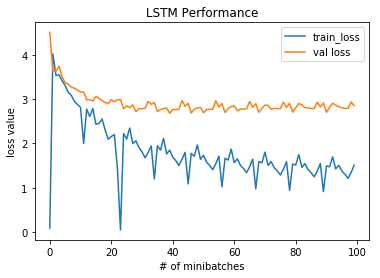

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import evaluate

output_dir='lstm75'
val_loss_file = "./output/{}/validation_loss.csv".format('lstm75')
train_loss_file = "./output/{}/train_loss.csv".format('lstm75')
files = {'train_loss':train_loss_file,'val loss': val_loss_file}
evaluate.plot_losses_from_files(output_dir,files,start=0,end=100,plot_title="LSTM Performance")

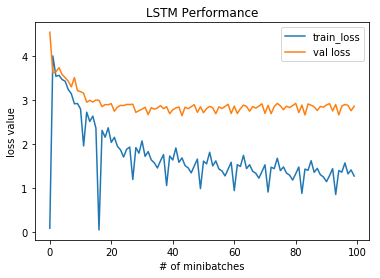

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import evaluate

output_dir='lstm100'
val_loss_file = "./output/{}/validation_loss.csv".format('lstm100')
train_loss_file = "./output/{}/train_loss.csv".format('lstm100')
files = {'train_loss':train_loss_file,'val loss': val_loss_file}
evaluate.plot_losses_from_files(output_dir,files,start=0,end=100,plot_title="LSTM Performance")

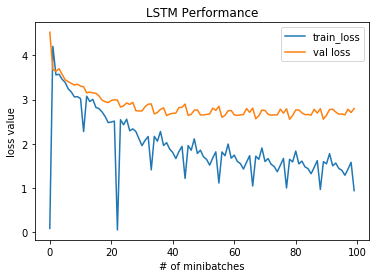

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import evaluate

output_dir='lstm50'
val_loss_file = "./output/{}/validation_loss.csv".format('lstm50')
train_loss_file = "./output/{}/train_loss.csv".format('lstm50')
files = {'train_loss':train_loss_file,'val loss': val_loss_file}
evaluate.plot_losses_from_files(output_dir,files,start=0,end=100,plot_title="LSTM Performance")

In [1]:
import evaluate
import torch
from Dataloader import Dataloader
from LSTM import LSTM

dataloader=Dataloader()

use_cuda = torch.cuda.is_available()

# Setup GPU optimization if CUDA is supported
if use_cuda:
    computing_device = torch.device("cuda")
    extras = {"num_workers": 1, "pin_memory": True}
    print("CUDA is supported")
else: # Otherwise, train on the CPU
    computing_device = torch.device("cpu")
    extras = False
    print("CUDA NOT supported")

output_dir='ehh'
model = LSTM(hidden_dim=200)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())#, lr=learning_rate)

PATH = "./output/{}/{}".format("lstm200","best.pt")
model.load_state_dict(torch.load(PATH,map_location=computing_device))

test_inputs,test_targets = dataloader.load_data('../pa4Data/train.txt')

evaluate.test(model, criterion, computing_device, test_inputs, test_targets, output_dir)

CUDA NOT supported


3.5991346127108526